In [31]:
from config import API_KEY
import pandas as pd
import matplotlib.pyplot as plt
import requests
from datetime import datetime

In [26]:
cities = ["Delhi","Mumbai","Chennai","Kolkata","Bengaluru",
          "Hyderabad","Pune","Ahmedabad","Jaipur","Lucknow"]
# API_key = os.getenv("WEATHER_API_KEY")
API_key = API_KEY
url = f'https://api.openweathermap.org/data/2.5/weather'
weather_data = []

In [27]:
for city in cities:
    params = {
        "q": city,
        "appid": API_key,
        "units": "metric",
    }

    response = requests.get(url=url,params=params)
    data =response.json()
    
    weather_data.append({
        "City": city,
        "Temp (°C)": data["main"]["temp"],
        "Humidity (%)": data["main"]["humidity"],
        "Wind (m/s)": data["wind"]["speed"],
        "Time": datetime.fromtimestamp(data["dt"])   # convert timestamp here
    })

In [28]:
df = pd.DataFrame(weather_data)
print(df)

        City  Temp (°C)  Humidity (%)  Wind (m/s)                Time
0      Delhi      16.05            72        0.00 2025-11-27 22:32:07
1     Mumbai      27.99            65        2.06 2025-11-27 22:29:53
2    Chennai      26.67            71        5.66 2025-11-27 22:28:10
3    Kolkata      20.97            73        0.00 2025-11-27 22:37:40
4  Bengaluru      18.52            85        5.36 2025-11-27 22:25:59
5  Hyderabad      21.23            68        3.09 2025-11-27 22:25:03
6       Pune      23.56            46        1.46 2025-11-27 22:28:28
7  Ahmedabad      23.02            68        1.03 2025-11-27 22:33:47
8     Jaipur      19.62            45        3.09 2025-11-27 22:30:01
9    Lucknow      14.99            94        1.03 2025-11-27 22:29:52


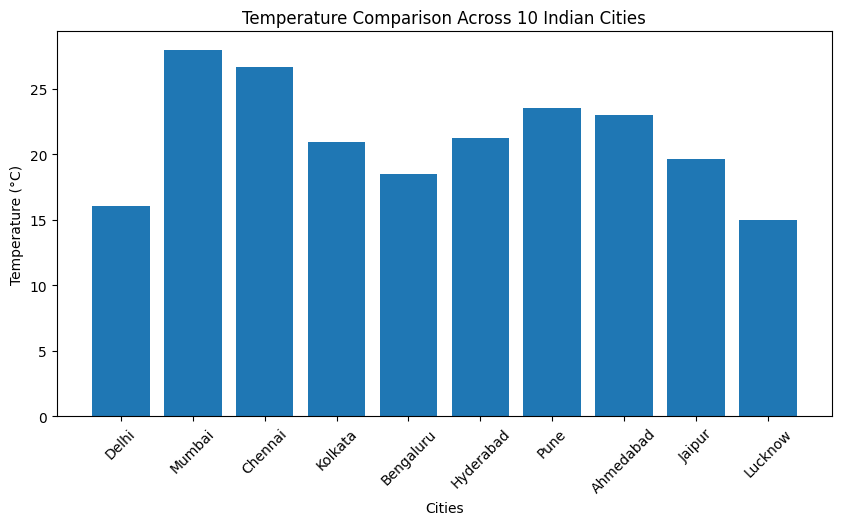

In [29]:
plt.figure(figsize=(10,5))
plt.bar(df["City"], df["Temp (°C)"])
plt.title("Temperature Comparison Across 10 Indian Cities")
plt.xlabel("Cities")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.show()